In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Number of males and females whose heart data is stored in the dataset**

In [5]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

 ### **Count of the number of males and females who have heart disease**

In [6]:
df.sex[df.target==1].value_counts()

1    300
0    226
Name: sex, dtype: int64

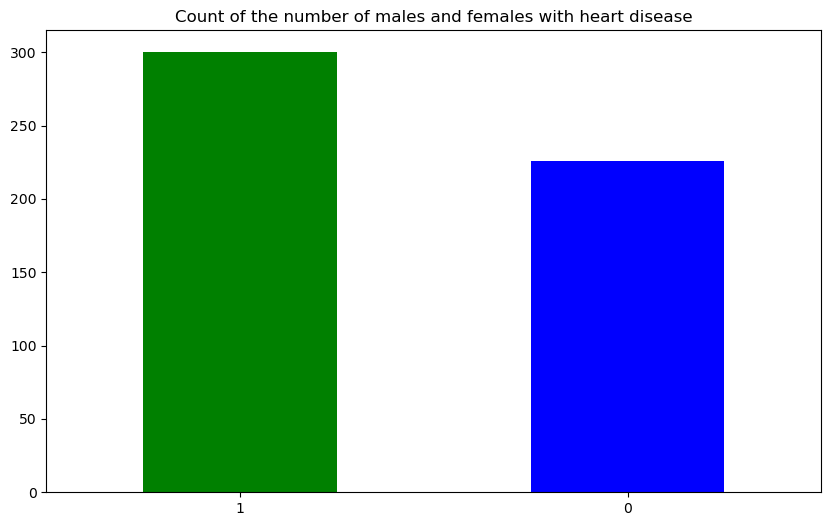

In [7]:
df.sex[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xticks(rotation=0);

In [8]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


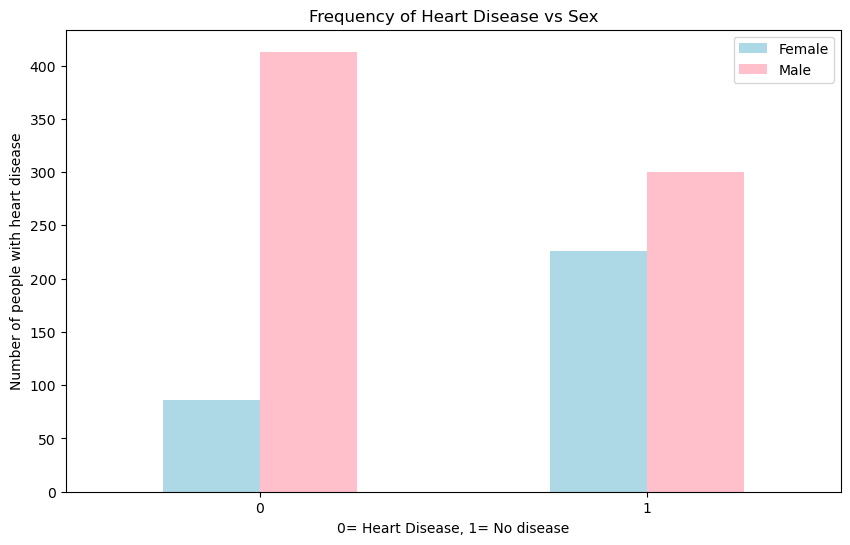

In [9]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## **Building a Correlation Matrix**

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

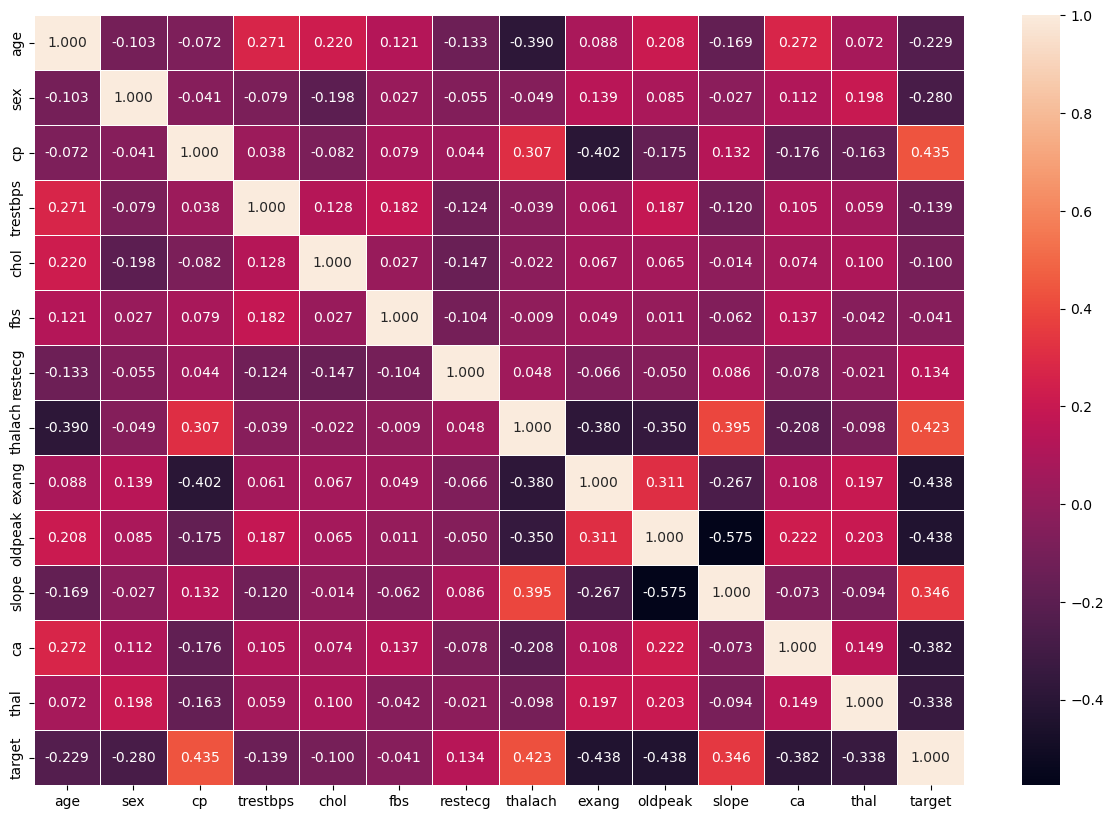

In [11]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


In [12]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['age', 	'sex', 	'cp', 'trestbps', 'chol', 	'fbs', 	'restecg', 	'thalach' ,	'exang', 	'oldpeak' ,	'slope', 	'ca', 'thal']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#df[features] = scaler.fit_transform(df[features])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0


## **Creating Features and Target variable**

In [14]:
X=df.drop("target",axis=1).values
Y=df.target.values

## **Splitting the data into train and test sets**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

## **Create a function for evaluating metrics**

In [16]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

## **Fitting and Comparing different Models**

In [17]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.859, 'recall': 0.832, 'F1 score': 0.86}


In [18]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.859, 'recall': 0.925, 'F1 score': 0.872}


In [19]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 1.0, 'recall': 1.0, 'F1 score': 1.0}


In [20]:
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.902, 'recall': 0.907, 'F1 score': 0.907}


In [21]:
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

{'accuracy': 1.0, 'recall': 1.0, 'F1 score': 1.0}


In [22]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,85.853659
1,Random Forest,100.000000
2,K-Nearest Neighbour,85.853659
3,Support Vector Machine,90.243902
4,XGBoost,100.000000


## **Tuning KNN**

In [23]:
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, Y_train).score(X_test,Y_test)}%")

Accuracy with 1 no. of neighbors: 1.0%
Accuracy with 2 no. of neighbors: 0.9804878048780488%
Accuracy with 3 no. of neighbors: 0.9804878048780488%
Accuracy with 4 no. of neighbors: 0.9121951219512195%
Accuracy with 5 no. of neighbors: 0.8585365853658536%
Accuracy with 6 no. of neighbors: 0.8634146341463415%
Accuracy with 7 no. of neighbors: 0.8926829268292683%
Accuracy with 8 no. of neighbors: 0.9024390243902439%
Accuracy with 9 no. of neighbors: 0.9024390243902439%
Accuracy with 10 no. of neighbors: 0.8926829268292683%
Accuracy with 11 no. of neighbors: 0.8829268292682927%
Accuracy with 12 no. of neighbors: 0.8731707317073171%
Accuracy with 13 no. of neighbors: 0.8731707317073171%
Accuracy with 14 no. of neighbors: 0.8682926829268293%
Accuracy with 15 no. of neighbors: 0.8731707317073171%
Accuracy with 16 no. of neighbors: 0.8731707317073171%
Accuracy with 17 no. of neighbors: 0.8780487804878049%
Accuracy with 18 no. of neighbors: 0.8682926829268293%
Accuracy with 19 no. of neighbors:

In [24]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.893, 'recall': 0.944, 'F1 score': 0.902}


# **Tuning Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,Y_train)
  print(f"Accuracy: {clf2.score(X_test,Y_test)*100:2f}%")

With 10 estimators:
Accuracy: 83.902439%
With 20 estimators:
Accuracy: 87.317073%
With 30 estimators:
Accuracy: 90.731707%
With 40 estimators:
Accuracy: 93.170732%
With 50 estimators:
Accuracy: 95.121951%
With 60 estimators:
Accuracy: 99.512195%
With 70 estimators:
Accuracy: 99.512195%
With 80 estimators:
Accuracy: 99.512195%
With 90 estimators:
Accuracy: 100.000000%
With 100 estimators:
Accuracy: 100.000000%
With 110 estimators:
Accuracy: 100.000000%
With 120 estimators:
Accuracy: 100.000000%
With 130 estimators:
Accuracy: 100.000000%
With 140 estimators:
Accuracy: 100.000000%
With 150 estimators:
Accuracy: 100.000000%
With 160 estimators:
Accuracy: 100.000000%
With 170 estimators:
Accuracy: 100.000000%
With 180 estimators:
Accuracy: 100.000000%
With 190 estimators:
Accuracy: 100.000000%
With 200 estimators:
Accuracy: 100.000000%
With 210 estimators:
Accuracy: 100.000000%
With 220 estimators:
Accuracy: 100.000000%
With 230 estimators:
Accuracy: 100.000000%
With 240 estimators:
Accurac

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF_clf2=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
RF_clf2.fit(X_train,Y_train)
RF2_acc_score=RF_clf2.score(X_test,Y_test)
RF2_Y_pred=RF_clf2.predict(X_test)
#print(RF2_acc_score)
evaluation(Y_test,RF2_Y_pred)

{'accuracy': 0.907, 'recall': 0.925, 'F1 score': 0.912}


# **Tuning XGBoost manually**

In [27]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train,Y_train)
xgb_score=XGB_clf.score(X_test,Y_test)
xgb_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,xgb_Y_pred)

{'accuracy': 1.0, 'recall': 1.0, 'F1 score': 1.0}


# **Hyper parameter tuning  SVC using GridSearchCV**

In [28]:

from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
gs_clf = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gs_clf.fit(X_train, Y_train)

print(gs_clf.best_params_)

print(f"Accuracy score:{gs_clf.score(X_test,Y_test)}%")



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.841 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.829 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 1/5] END .......C=2, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .......C=2, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 3/5] END .......C=2, gamma=1, kernel=linear;, score=0.780 total time=   0.0s
[CV 4/5] END .......C=2, gamma=1, kernel=linear;, score=0.872 total time=   0.0s
[CV 5/5] END .......C=2, gamma=1, kernel=linear;, score=0.811 total time=   0.0s
[CV 1/5] END ........C=2, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 2/5] END ........C=2, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.0s
[CV 3/5] END ........C=2, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 4/5] END ........C=2, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 5/5] END ........C=2, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 1/5] END .....C=2, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .....C=2, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 3/5] END .....C=2, gamma

[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.854 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.854 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.774 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.884 total time=   0.0s
[CV 5/5] END ...C=100, gamma

# **Hyper parameter tuning KNN using GridSearchCV**

In [29]:
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, Y_train)

gs_knn.best_params_

print(f"Accuracy score:{gs_knn.score(X_test,Y_test)*100}%")

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits
Accuracy score:100.0%


In [30]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,85.853659
1,Random Forest,90.731707
2,K-Nearest Neighbour,89.268293
3,Support Vector Machine,90.243902
4,Extreme Gradient Boost,100.000000


# **Trying StackingCV Classifier**

In [32]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 245.8 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.4 MB 272.3 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 305.0 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 305.0 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 238.1 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 238.1 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.4 MB 2

In [33]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,Knn_clf,RF_clf2],meta_classifier= Knn_clf)
scv.fit(X_train,Y_train)
scv_score=scv.score(X_test,Y_test)
scv_Y_pred=scv.predict(X_test)
#print(SVC_score)
evaluation(Y_test,scv_Y_pred)

{'accuracy': 0.902, 'recall': 0.944, 'F1 score': 0.91}


In [34]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost', 'StackingCV Classifier'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100, scv_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,85.853659
1,Random Forest,90.731707
2,K-Nearest Neighbour,89.268293
3,Support Vector Machine,90.243902
4,Extreme Gradient Boost,100.000000
5,StackingCV Classifier,90.243902


# **Looking at the evaluation metrics for our best model**

As we can see, the StackingCV Classifier gives us an accuracy of 92%. 

Let us evaluate the model now.

In [35]:
print(" Best evaluation parameters achieved with KNN:") 
evaluation(Y_test,scv_Y_pred)

 Best evaluation parameters achieved with KNN:
{'accuracy': 0.902, 'recall': 0.944, 'F1 score': 0.91}


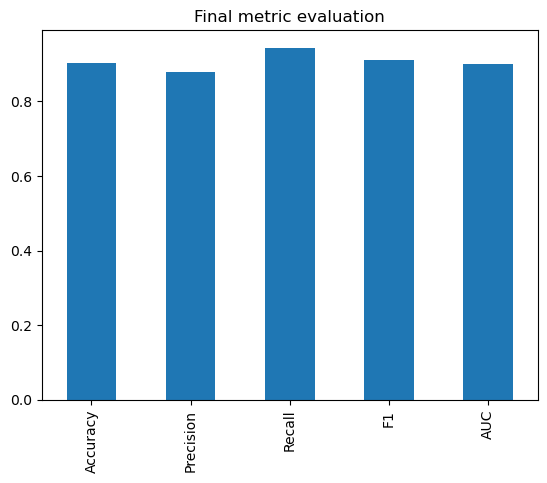

In [36]:
final_metrics={'Accuracy': scv.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,scv_Y_pred),
                   'Recall': recall_score(Y_test,scv_Y_pred),
                   'F1': f1_score(Y_test,scv_Y_pred),
                   'AUC': roc_auc_score(Y_test,scv_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

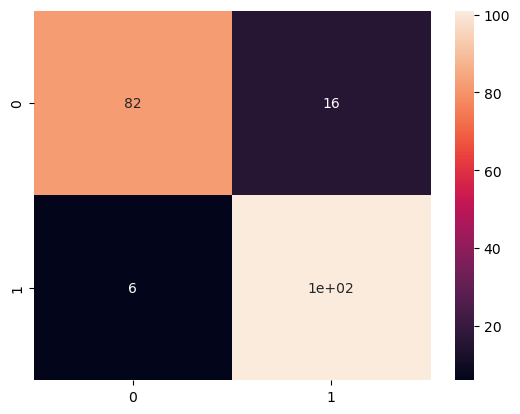

In [37]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,Knn_Y_pred),annot=True,cbar=True);

In [39]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
scv_Y_pred=scv.predict(user_input)
if(scv_Y_pred[0]==0):
  print("Warning! You have chances of getting a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")


Enter the values one by one57,0,0,120,354,0,1,163,1,0.6,2,0,2
You are healthy and are less likely to get a heart disease!


C:\Users\hardi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



# **Let's save our model using pickle**

In [40]:
import pickle as pkl
pkl.dump(scv,open("final_model.p","wb"))